In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
#This is an interactive 3D scatter plot to visualize the Iris dataset
from plotly.express import scatter_3d
import seaborn as sns
iris = sns.load_dataset("iris")
# Plotting in 3D by plotly.express that would show the plot with capability of zooming,
# changing the orientation, and rotating
scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length', size="petal_width",
                   color="species", color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre": "pink"})\
            .show()

In [44]:
# import iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [57]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C,gamma=0).fit(X, y)

In [58]:
# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100 #Step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

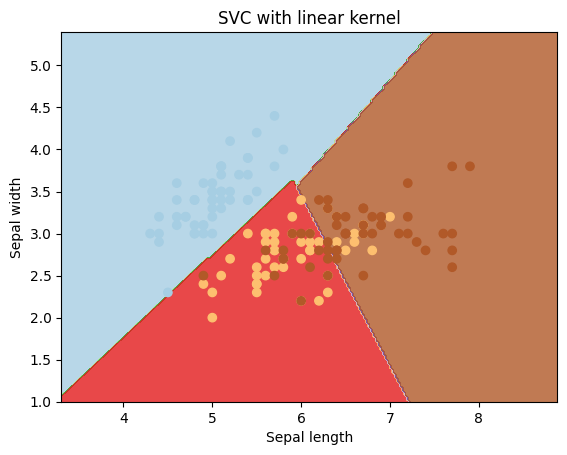

In [59]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) ##flatten the mesh grid arrays xx and yy into 1D arrays and concatenate them. Makes predictions based on the inputs.
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) #draws filled contour plots of the decision boundaries based on the predicted labels (Z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

These lines together plot the decision boundary and the data points on the same plot, allows you to visually assess how well the SVM classifier separates different classes.

**Change Kernel fuction to see the impact.**

In [65]:
#Radial basis function (RBF) kernel is used
svc = svm.SVC(kernel='rbf', C=1,gamma=0.5).fit(X, y) #gamma and C are a hyperparameter

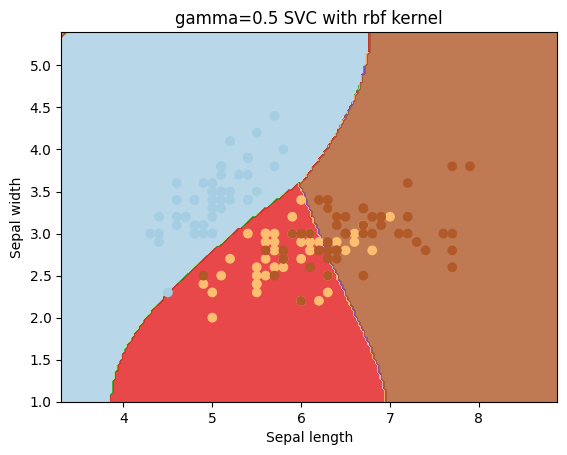

In [66]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

#Plot the results
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #flatten the mesh grid arrays xx and yy into 1D arrays
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('gamma=0.5'+' SVC with rbf kernel')
plt.show()

In Support Vector Machine (SVM) classifiers with a radial basis function (RBF) kernel, the decision boundary tends to be nonlinear and can take on various shapes depending on the complexity of the dataset and the parameters of the model.

Plots for different values of gamma to see the effect.

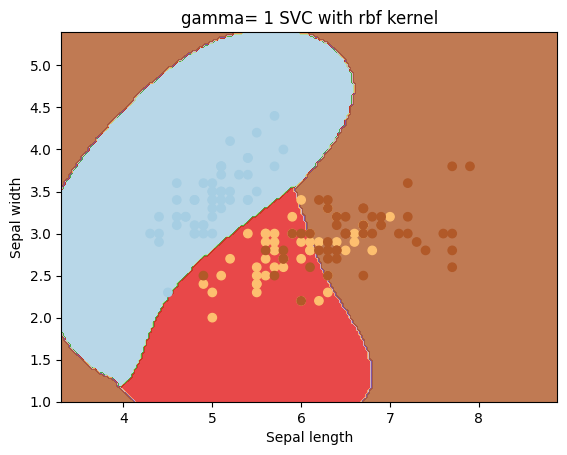

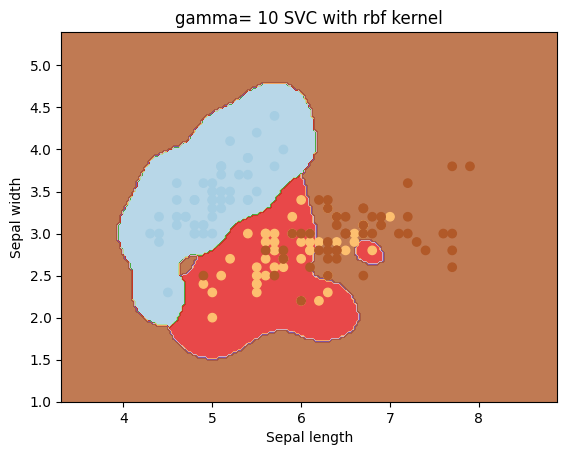

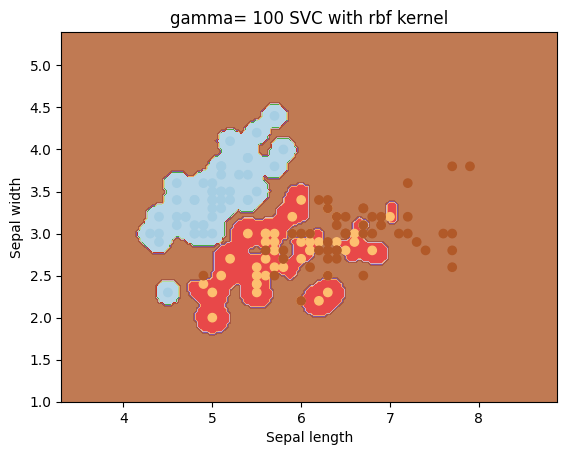

In [62]:
g_list=[1,10,100]
for g in g_list:
  svc = svm.SVC(kernel='rbf', C=1,gamma=g).fit(X, y)
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('gamma= '+str(g)+' SVC with rbf kernel')
  plt.show()


A higher value of gamma leads to a more complex decision boundary, as it increases the influence of individual data points, resulting in a tighter fit to the training data. This can lead to overfitting if gamma is too high.
Conversely, a lower value of gamma results in a smoother decision boundary, which may generalize better to unseen data but may also lead to underfitting if gamma is too low.

**Effect of penalty parameter C.**

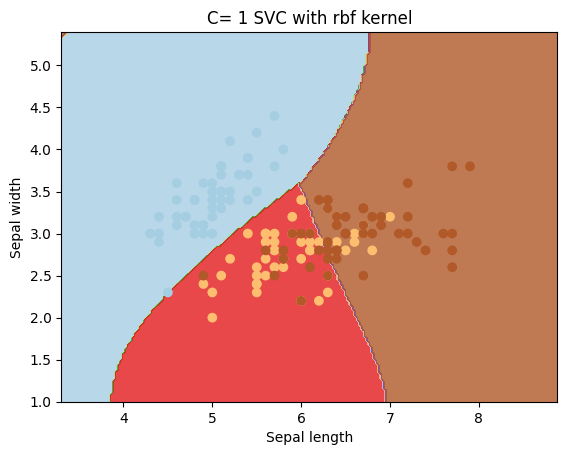

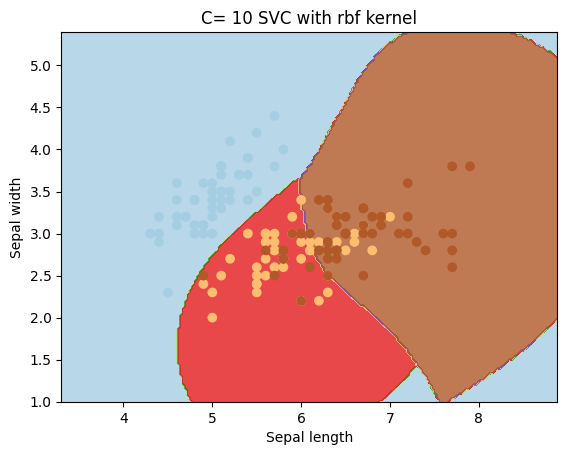

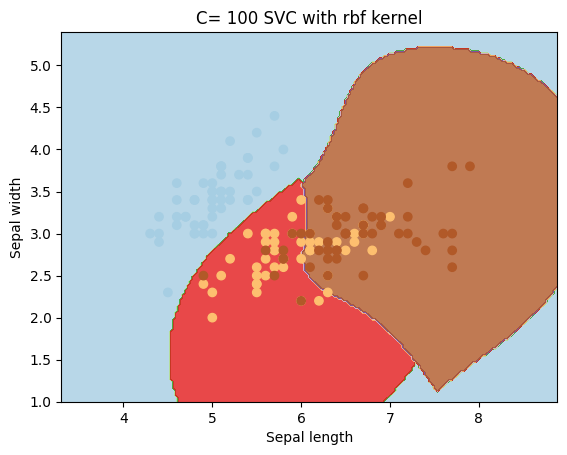

In [67]:
C_list=[1,10,100]
for c in C_list:
  svc = svm.SVC(kernel='rbf', C=c,gamma=0.5).fit(X, y)
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('C= '+str(c)+' SVC with rbf kernel')
  plt.show()


The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error.
A smaller C allows for a softer margin, which may result in a smoother decision boundary that is less influenced by individual data points.
A larger C imposes a harder margin, potentially leading to a more complex decision boundary that closely follows the training data.

#Naive Bayes

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [69]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB(var_smoothing=0.5) #'var_smoothing' is a smoothing parameter that adds a fraction of the largest variance of all features to the variances for calculation stability.

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)



In [70]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.80


In [71]:
# Visualize the decision boundaries (2D visualization)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



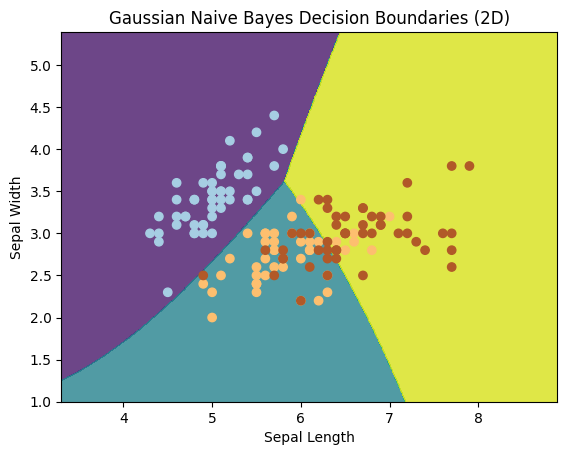

In [72]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Gaussian Naive Bayes Decision Boundaries (2D)")
plt.show()

Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=3,   # use any cross validation technique
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train)

gs_NB.best_params_
gs_NB.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


0.8285714285714286

Lets see how decision boundary changes with var_smoothing

Accuracy: 0.82


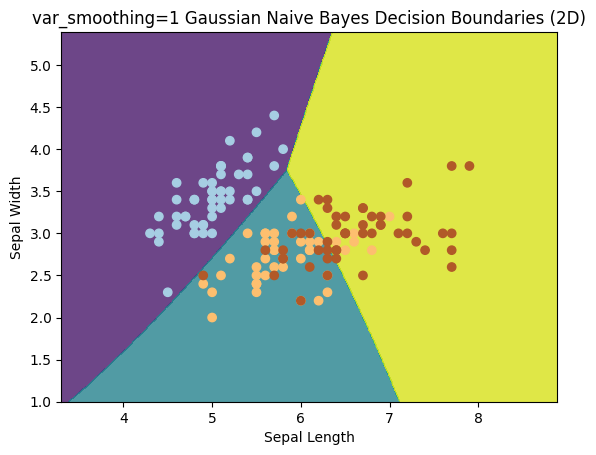

Accuracy: 0.40


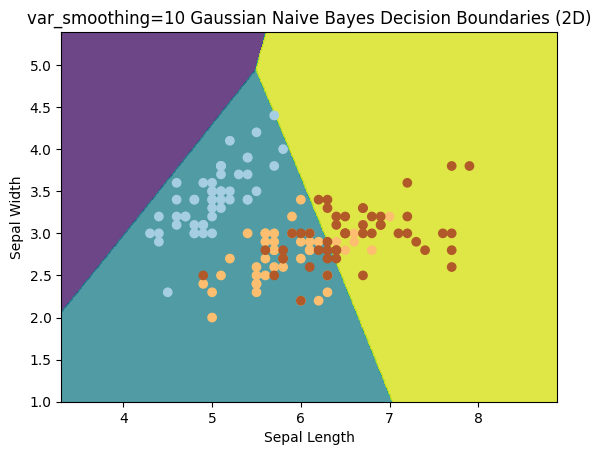

Accuracy: 0.40


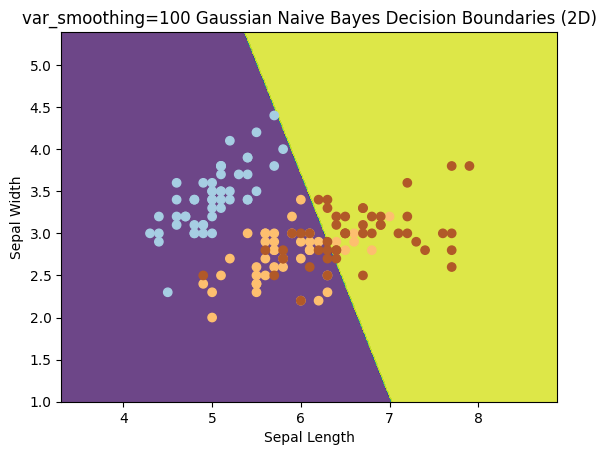

In [74]:
for i in [1,10,100]:
 # Create a Gaussian Naive Bayes classifier
        gnb = GaussianNB(var_smoothing=i)

        # Train the classifier on the training data
        gnb.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = gnb.predict(X_test)
        # Calculate the accuracy of the classifier
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        # Visualize the decision boundaries (2D visualization)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel("Sepal Length")
        plt.ylabel("Sepal Width")
        plt.title('var_smoothing='+str(i)+" Gaussian Naive Bayes Decision Boundaries (2D)")
        plt.show()

By adding a small amount to the variances, var_smoothing can help control overfitting, especially in cases where the training data is limited or noisy.
Higher values of var_smoothing tend to result in a smoother decision boundary, which may improve generalization performance on unseen data but may also lead to a loss of precision and can lead to underfitting